In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: June 24, 2024
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: June 24, 2024\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import os
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
def read_data_from_toymodel(file_path):
    print("Reading data...\n")

    try:
        column_names = ['eventID', 'trackID', 'parentID', 'particleID', 'copyNb1 (mother volume)', 'copyNb', 'material', 'time (ns)', 'energy (MeV)', 'energy deposit (MeV)', 'parent process name', 'process name', 'px (MeV/c)', 'py (MeV/c)', 'pz (MeV/c)', 'step length (cm)', 'x (cm)', 'y (cm)', 'z (cm)']
        df = pd.read_csv(file_path, delimiter='\t', header=None, names=column_names)  # Assumes tab-separated values in the text file
 
        # Convert all columns to string data type
        df = df.astype(str)
        
        print("Grouping data...")
        # Group by eventID and trackID
        grouped_data = df.groupby(['eventID'])

        # Clear the data buffer
        del df

        print("Finished data reading!")
        return grouped_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse data from '{file_path}'. Please ensure the file has the correct format.")
        return None

In [4]:
data = read_data_from_toymodel("/NAS/JC/2024_simulation/2024/Daughter_anti_He3_1e4_TOI.dat")

Reading data...

Grouping data...
Finished data reading!


In [5]:
if data is not None:
    N_mu_plus = []
    N_mu_minus = []
    #He3_parent_ID_array = []
    try:
        event_keys = list(data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            data_track = data.get_group(event_keys[i])
            data_track = data_track.groupby(['trackID'])
            track_keys = list(data_track.groups.keys())
            mu_plus = 0
            mu_minus = 0
            abnormal_daughter = 'NaN'
            # j is track ID
            for j in range(len(track_keys)):
                #abnormal_daughter = str(data_track.get_group(track_keys[j]).iloc[0]['parent process name'])
                #if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211' and str(data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211'):
                    mu_plus = mu_plus + 1
                    # get the particle ID of this track
                    #print("first track of event", event_keys[i], "is", data_track.get_group(track_keys[j]).iloc[0]['particleID'])
                #elif(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211' and str(data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                elif(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211'):
                    mu_minus = mu_minus + 1
            #if(mu_plus + mu_minus == 0):
                #print(event_keys[i])
            N_mu_plus.append(mu_plus)
            N_mu_minus.append(mu_minus)
            #He3_parent_ID_array.append(abnormal_daughter)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


[###                                               ] 6.80% 68/1000

KeyboardInterrupt: 

In [6]:
#print(He3_parent_ID_array)
#plt.hist(He3_parent_ID_array)

In [ ]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_Pion_profile = [N_mu_plus, N_mu_minus]
anti_He3_Pion_label = ['anti_He3_Pion_plus', 'anti_He3_Pion_minus']
anti_He3_Pion_color = ['darkblue', 'blue']

plt.figure(1)

# Determine the range of the data to set integer bins
all_values = N_mu_plus + N_mu_minus
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

plt.hist(anti_He3_Pion_profile, bins=bins, label=anti_He3_Pion_label, color=anti_He3_Pion_color, edgecolor='black')

# Add labels and title
plt.xlabel('# of pions generated')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(len(N_mu_plus))+ ' antiHelium3 events')

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))

# Show the plot
plt.show()


NameError: name 'N_mu_plus' is not defined

In [8]:
# clear data cache
del data

In [ ]:
proton_data = read_data_from_toymodel("/NAS/JC/2024_simulation/2024/Daughter_anti_proton_1e4_TOI.dat")

Reading data...

Grouping data...
Finished data reading!


In [ ]:
if proton_data is not None:
    proton_N_mu_plus = []
    proton_N_mu_minus = []
    proton_parent_ID_array = []
    try:
        event_keys = list(proton_data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            proton_data_track = proton_data.get_group(event_keys[i])
            proton_data_track = proton_data_track.groupby(['trackID'])
            track_keys = list(proton_data_track.groups.keys())
            mu_plus = 0
            mu_minus = 0
            parent_ID = 'NaN'
            # j is track ID
            for j in range(len(track_keys)):
                #if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211' and str(proton_data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211'):
                    parent_ID = str(proton_data_track.get_group(track_keys[j]).iloc[0]['parentID'])
                    mu_plus = mu_plus + 1
                    # get the particle ID of this track
                    #print("first track of event", event_keys[i], "is", proton_data_track.get_group(track_keys[j]).iloc[0]['particleID'])
                #elif(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211' and str(proton_data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                elif(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211'):
                    parent_ID = str(proton_data_track.get_group(track_keys[j]).iloc[0]['parentID'])
                    mu_minus = mu_minus + 1
            proton_N_mu_plus.append(mu_plus)
            proton_N_mu_minus.append(mu_minus)
            proton_parent_ID_array.append(parent_ID)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# clear data cache
del proton_data


[##################################################] 100.00% 100000/100000

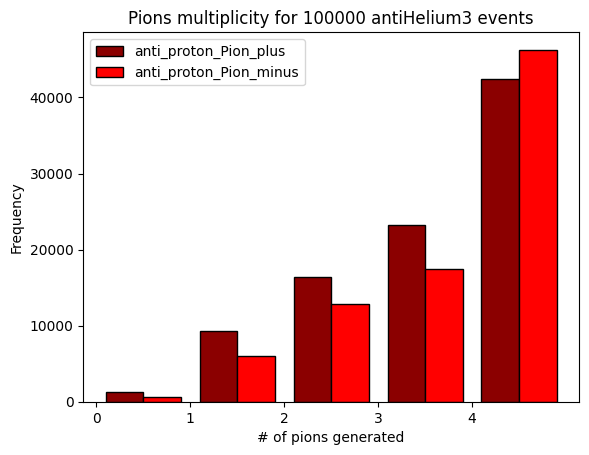

In [ ]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_proton_Pion_profile = [proton_N_mu_plus, proton_N_mu_minus]
anti_proton_Pion_label = ['anti_proton_Pion_plus', 'anti_proton_Pion_minus']
anti_proton_Pion_color = ['darkred', 'red']


plt.figure(1)

# Determine the range of the data to set integer bins
all_values = proton_N_mu_plus + proton_N_mu_minus
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

plt.hist(anti_He3_Pion_profile, bins=bins, label=anti_proton_Pion_label, color=anti_proton_Pion_color, edgecolor='black')

# Add labels and title
plt.xlabel('# of pions generated')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(len(N_mu_plus))+ ' antiHelium3 events')

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))

# Show the plot
plt.show()


(array([[2.6900e+02, 1.3550e+03, 3.5160e+03, 6.4390e+03, 6.6610e+03,
        8.3240e+03, 1.0282e+04, 1.2210e+04, 1.3203e+04, 1.2588e+04,
        1.0343e+04, 7.4710e+03, 4.2640e+03, 2.0030e+03, 7.6800e+02,
        2.4700e+02, 4.8000e+01, 9.0000e+00],
       [1.8940e+03, 9.8770e+03, 2.1023e+04, 3.6347e+04, 1.9723e+04,
        9.5170e+03, 1.5250e+03, 9.3000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00]]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.]), <a list of 2 BarContainer objects>)


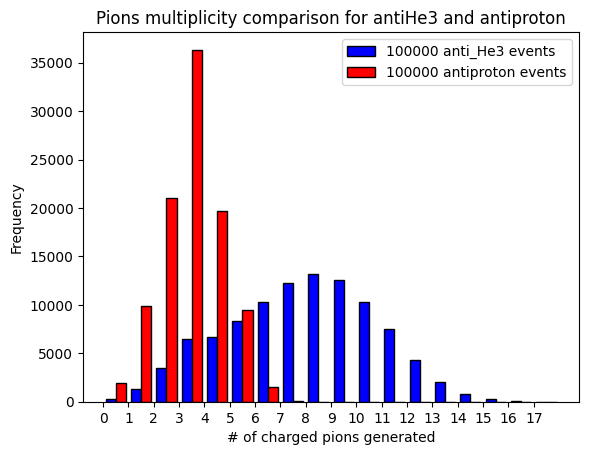

In [15]:
He3bar_charged_pion = np.array(N_mu_minus) + np.array(N_mu_plus)
He3bar_charged_pion = np.repeat(He3bar_charged_pion,100,axis=0)
protonbar_charged_pion = np.array(proton_N_mu_plus) + np.array(proton_N_mu_minus)

Charged_pion_comparison = [He3bar_charged_pion, protonbar_charged_pion]
Charged_pion_label = [f'{len(He3bar_charged_pion)} anti_He3 events', f'{len(protonbar_charged_pion)} antiproton events']
Charged_pion_color = ['blue', 'red']

plt.figure(1)

# Determine the range of the data to set integer bins
all_values = np.append(He3bar_charged_pion, protonbar_charged_pion)
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

test = plt.hist(Charged_pion_comparison, bins=bins, label=Charged_pion_label, color=Charged_pion_color, edgecolor='black')
print(test)
# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))


# Add labels and title
plt.xlabel('# of charged pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity comparison for antiHe3 and antiproton')

# Show the plot
plt.show()

In [13]:
print(np.sum(test[0][0][9:,]))
print(np.sum(test[0][1][9:,]))

3774100.0
0.0


In [ ]:
# Save the array to a file
np.save('anti_He3_Pion_profile.npy', anti_He3_Pion_profile)
np.save('anti_proton_Pion_profile.npy', anti_proton_Pion_profile)

In [14]:
# Mean and standard deviation
#model A
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2.65 + 3.65 * np.log(4)
anti_He3_mu = 2.65 + 3.65 * np.log(6)

anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(anti_deuteron_mu * 0.174 * math.pow(4, 0.4))
anti_He3_sigma = np.sqrt(anti_He3_mu * 0.174 * math.pow(6, 0.4))
"""
#model B
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2 * anti_proton_mu
anti_He3_mu = 3 * anti_proton_mu
anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(2) * anti_proton_sigma
anti_He3_sigma = np.sqrt(3) * anti_proton_sigma
"""

# Generate random numbers from the Gaussian distribution
anti_proton_corner_Charged_pion_model = np.random.normal(anti_proton_mu, anti_proton_sigma, size=1000)
anti_He3_corner_Charged_pion_model = np.random.normal(anti_He3_mu, anti_He3_sigma, size=1000)

